In [148]:
using AutomotiveDrivingModels
using AutoViz
using Interact

In [149]:
traj_id = 1
input_filepath = "../../data/trajdatas/traj_$(traj_id).txt"
veh_filepath = "../../data/trajdatas/veh_idxs.csv";

In [150]:
infile = open(input_filepath, "r")
trajdata = read(infile, Trajdata);
veh_idxs = readtable(veh_filepath)
veh_idx = veh_idxs[:veh_idx][traj_id]

1

In [155]:
sampling_time = 5.
prime_time = 10.
num_frames = Int(ceil((sampling_time + prime_time) * 10))
rec = SceneRecord(num_frames, .1)
scene = Scene();

In [156]:
for i in 1:num_frames
    AutomotiveDrivingModels.update!(rec, get!(scene, trajdata, i))
end

In [157]:
roadway = gen_stadium_roadway(5, length=400., radius=100.);

Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(75, nactions=1),"frame",75,"75",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(68=>"68",148=>"148",124=>"124",2=>"2",89=>"89",11=>"11",39=>"39",46=>"46",85=>"85",134=>"134"…)),Any[],Any[],true,"horizontal")

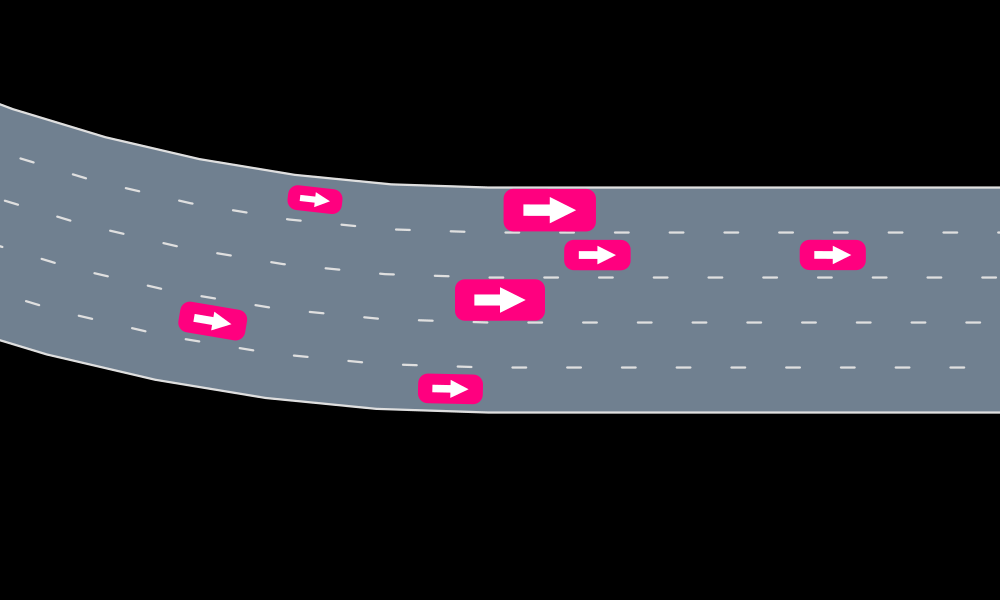

In [158]:
@manipulate for frame in 1:length(rec)
    AutoViz.render(get_scene(rec, frame - length(rec)), roadway, cam=CarFollowCamera(veh_idx, 15.))
end